Considere el siguiente modelo simple de un condensador electrónico, que consta de dos placas metálicas planas encerradas en una caja metálica cuadrada:

<img src="ejercicio9.3.png"> 

Para simplificar, modelemos el sistema en dos dimensiones. Usando cualquiera de los métodos que hemos estudiado, escriba un programa para calcular el potencial electrostático en la caja en una cuadrícula de 100 × 100 puntos, donde las paredes de la caja están en voltaje cero y las dos placas (que son de espesor insignificante) están en voltajes ± 1 V como se muestra. Haga que su programa calcule el valor del potencial en cada punto de la cuadrícula con una precisión de 10 a 6 voltios y luego haga un diagrama de densidad del resultado.

Sugerencia: Observe que las placas del condensador tienen un voltaje fijo, no una carga fija, por lo que este problema difiere del problema con las dos cargas en el ejercicio 9.1. En efecto, las placas de condensadores son parte de la condición de límite en este caso: se comportan de la misma manera que las paredes de la caja, con potenciales fijados a un cierto valor y que no pueden cambiar.

In [1]:
from numpy import zeros
from pylab import imshow, gray, show, cool


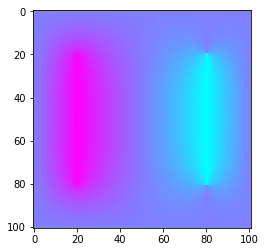

In [2]:
# Constantes

V = 1.0  # voltios
a = 0.1  # espaciado de cuadrícula en centímetros
N = 100  # número de puntos de cuadrícula
delta = 10 ** -6  # voltios
omega = 0.9

def larger(a, b):
    if a >= b:
        return a
    else:
        return b

# Resuelve la ecuación de Poisson usando el método de relajación de Gauss-Seidel

max_diff = 2 * delta

# iniciando array

phi = zeros([N + 1, N + 1], float)
phi[20:81, 20] = V
phi[20:81, 80] = -V
while max_diff > delta:
    #  restableciendo la diferencia máxima después de cada actualización completa de la cuadrícula
    max_diff = 0.0
    for i in range(N + 1):
        for j in range(N + 1):
            if not i == 0 and not j == 0 and not i == N and not j == N and not (20 <= i <= 80 and j == 20 or j == 80):
                old_phi = phi[i,j]
                new_phi = (1 + omega) * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) / 4 \
                          - omega * old_phi
                phi[i, j] = new_phi

                # teniendo en cuenta el mayor cambio en phi en esta actualización de la cuadrícula
                max_diff = larger(max_diff, abs(new_phi - old_phi))
    #print("max_diff = ", max_diff)


imshow(phi)
cool()
show()
